In [10]:
# !pip install scikit-learn-extra

In [11]:
# Importar librerías
import pandas as pd
import numpy as np

import re

import seaborn as sns
import matplotlib.pyplot as plt

import re
import os

from sklearn.datasets import make_blobs
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from auto_clusters import kmeans_auto_clusters, pendiente

In [12]:
# Load the data
df = pd.read_excel('../data/processed/coprolitos_processed.xlsx')

# Inspeccionar primeros elementos
df.head()

,Ejemplar,Numero_de_inclusiones,Agujeros,Lineas_de_corrosion,Señal_quimica,Diametro_mm,Arreglo_de_inclusiones,Forma_de_fracturas_en_terminaciones
0,bump headed lace,4,2,1,1,1,2,5
1,bump headed lace,4,2,2,1,1,2,3
2,circular,1,2,1,1,1,4,5
3,circular,3,2,2,1,2,4,5
4,cilíndrico,1,2,1,1,3,1,5


In [13]:
df.columns

Index(['Ejemplar', 'Numero_de_inclusiones', 'Agujeros', 'Lineas_de_corrosion',
       'Señal_quimica', 'Diametro_mm', 'Arreglo_de_inclusiones',
       'Forma_de_fracturas_en_terminaciones'],
      dtype='object')

In [14]:
ejemplar = df["Ejemplar"]

X = df.drop("Ejemplar", axis = 1)
X

,Numero_de_inclusiones,Agujeros,Lineas_de_corrosion,Señal_quimica,Diametro_mm,Arreglo_de_inclusiones,Forma_de_fracturas_en_terminaciones
0,4,2,1,1,1,2,5
1,4,2,2,1,1,2,3
2,1,2,1,1,1,4,5
3,3,2,2,1,2,4,5
4,1,2,1,1,3,1,5
5,3,2,2,2,2,4,5
6,1,2,1,1,3,1,5
7,4,2,1,1,1,4,5
8,2,2,2,2,2,4,1
9,3,2,2,1,1,2,5


In [15]:
# Crear el codificador One-Hot
one_hot_encoder = OneHotEncoder()

# Aplicar la codificación One-Hot
X_encoded = one_hot_encoder.fit_transform(X).toarray()

# Convertir a DataFrame para una mejor visualización
df_encoded = pd.DataFrame(X_encoded, columns = one_hot_encoder.get_feature_names_out(X.columns))

df_encoded

,Numero_de_inclusiones_1,Numero_de_inclusiones_2,Numero_de_inclusiones_3,Numero_de_inclusiones_4,Agujeros_1,Agujeros_2,Agujeros_3,Agujeros_4,Lineas_de_corrosion_1,Lineas_de_corrosion_2,...,Diametro_mm_2,Diametro_mm_3,Diametro_mm_4,Arreglo_de_inclusiones_1,Arreglo_de_inclusiones_2,Arreglo_de_inclusiones_4,Forma_de_fracturas_en_terminaciones_1,Forma_de_fracturas_en_terminaciones_3,Forma_de_fracturas_en_terminaciones_4,Forma_de_fracturas_en_terminaciones_5
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# K-Mediodes

In [16]:
# Ejecutar el K-Mediodes...
n_samples = df_encoded.shape[0]
n_clusters = 4

# Aplicar K-Medoides
kmedoids = KMedoids(n_clusters = n_clusters, random_state=42)
kmedoids.fit(df_encoded)
labels = kmedoids.predict(df_encoded)
labels

c:\ProgramData\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


array([3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 3, 0,
       0], dtype=int64)

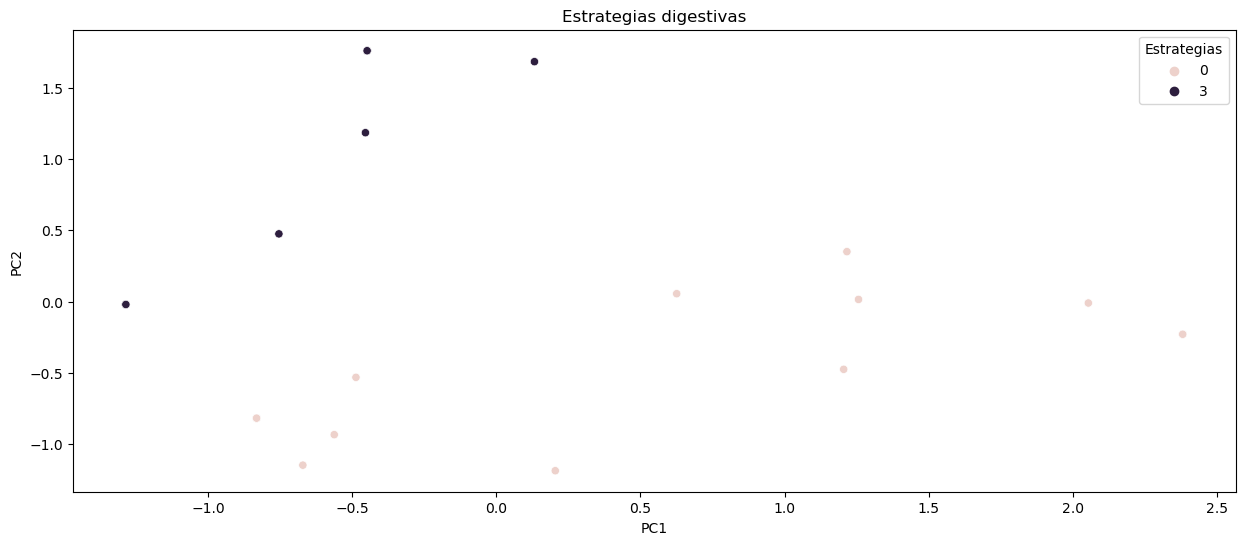

In [17]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(df_encoded)

pca_df = pd.DataFrame(X_pca, columns = ["PC1", "PC2"])
pca_df_dx = pca_df.copy()
pca_df_dx["Estrategias"] = labels

pca_df_dx["Ejemplar"] = ejemplar

plt.figure(figsize=(15, 6))  # Cambia (10, 6) a las dimensiones deseadas

sns.scatterplot(data = pca_df_dx, x = "PC1", y = "PC2", hue = "Estrategias")

# Para mostrar los nombres de cada ejemplar...
for i, row in pca_df_dx.iterrows():
    if i % 2 == 0:
        index_col = -0.06
        index_row = 0.2
    else:
        index_col = 0.05
        index_row = 0
    # plt.text(row['PC1'] + index_row, (row['PC2']) + index_col, row['Ejemplar'][:5], fontsize=9, ha='right')

plt.title("Estrategias digestivas")
plt.show()

In [18]:
# Crear la tabla cruzada entre las columnas 'Predicted' y 'Actual'
crosstab = pd.crosstab(pca_df_dx['Estrategias'], pca_df_dx['Ejemplar'])

crosstab = crosstab.reset_index(drop = True)
crosstab

Ejemplar,bump headed lace,cilíndrico,circular,cono,elipsoidal,elongado,encaje delgado,espiral,forma de encaje recto,forma de pino,forma de rosario,irregular
0,1,1,1,1,1,2,2,1,1,1,1,1
1,1,3,1,0,0,0,1,0,1,0,0,2


# TSNE

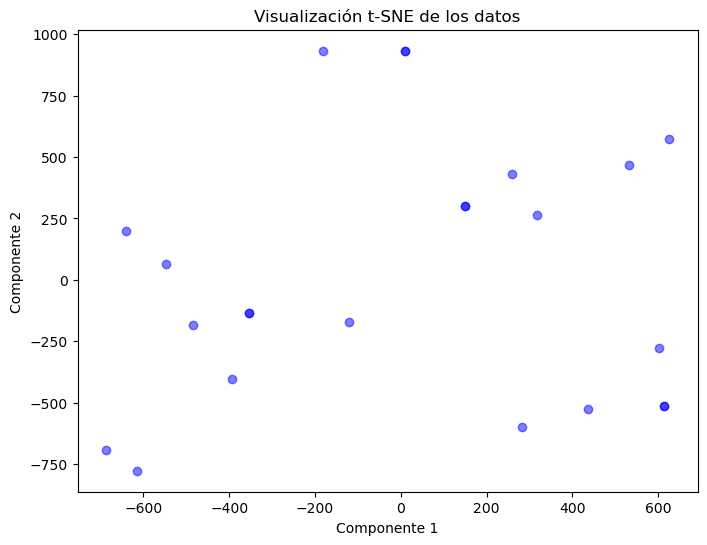

In [19]:
# Crear una instancia de TSNE con el número deseado de componentes (usualmente 2 o 3)
tsne = TSNE(n_components=2, perplexity=2, random_state=42)

# Aplicar TSNE al conjunto de datos
X_tsne = tsne.fit_transform(df_encoded)
df_tsne = pd.DataFrame(X_tsne, columns = ["Componente 1", "Componente 2"])

# Visualizar los datos en 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='b', alpha=0.5)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Visualización t-SNE de los datos')
plt.show()

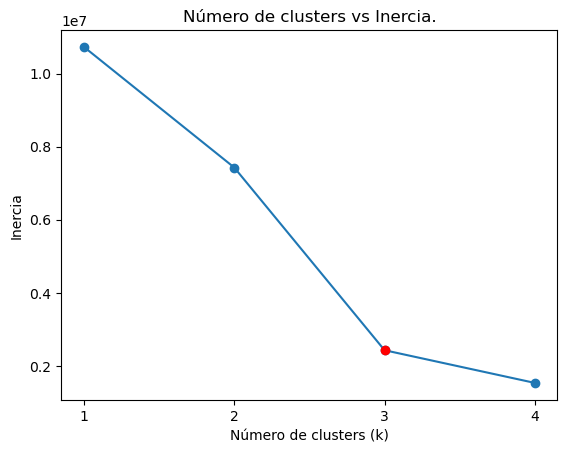

In [20]:
clusters_recomendados, df_tsne["Estrategias"] = kmeans_auto_clusters(df_tsne, verbose = False, graph = True)

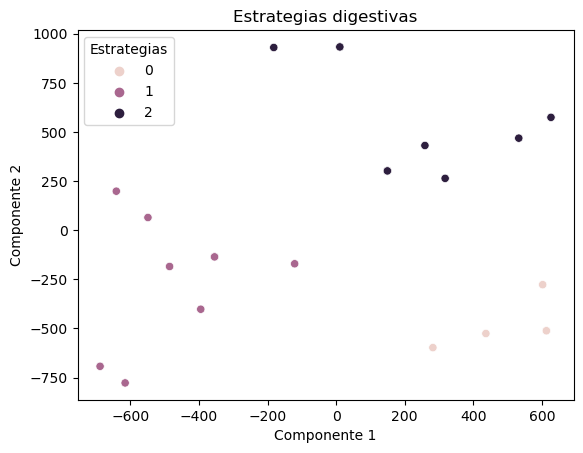

In [21]:
sns.scatterplot(data = df_tsne, x = "Componente 1", y = "Componente 2", hue = df_tsne["Estrategias"])
plt.title("Estrategias digestivas")
plt.show()